# Name : *Mariam Bebawy*  
## Track : *Data Science & Business Analytics*  

### Task 3 : *Exploratory Data Analysis*  
as a business manager, try to find the weak areas where you can work to make more profit  
what are all the business problems you can derive by exploring the data?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./SampleSuperstore.csv')
print(data.shape)
data.head()

(9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# check for overall information and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [15]:
# check for duplicate rows
data.drop_duplicates(inplace=True)
print(data.shape)
data.head()

(9977, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [18]:
# check unique values in each column
print(data.columns)
data.nunique()

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [19]:
# drop unnecessary columns
data_sub = data[['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']]
data_sub.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot:>

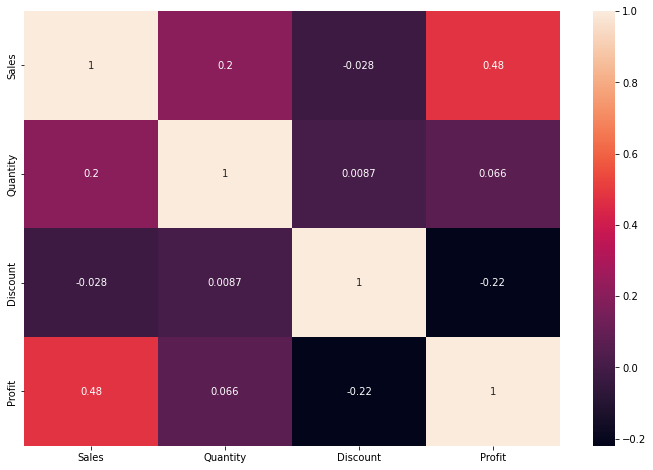

In [26]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(data_sub.corr(), annot=True)
ax

In [27]:
# weak +ve corr between 'Sales' and 'Profit'
# very weak +ve (almost zero) corr between 'Quantity' and 'Profit'
# very weak -ve (almost zero) corr between 'Discount' and 'Profit'

<Figure size 864x576 with 0 Axes>

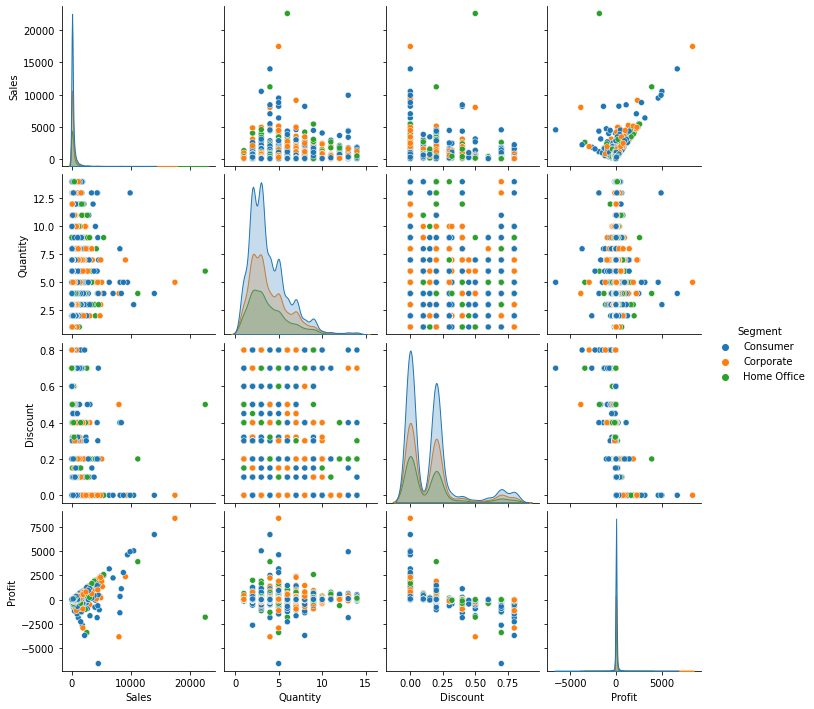

In [30]:
plt.figure(figsize=(12,8))
ax = sns.pairplot(data_sub, hue='Segment')
ax

<Figure size 864x576 with 0 Axes>

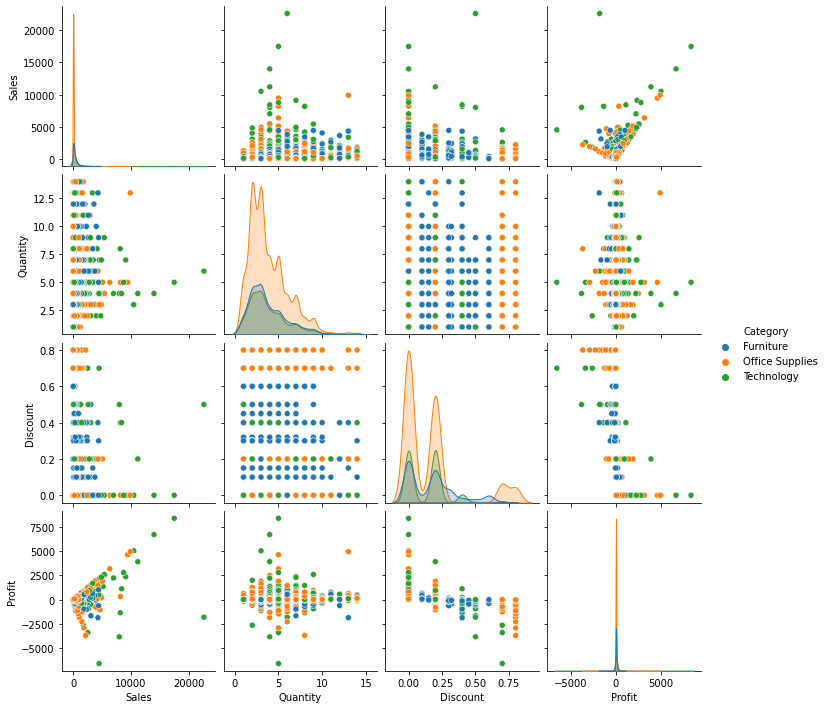

In [33]:
plt.figure(figsize=(12,8))
ax = sns.pairplot(data_sub, hue='Category')
ax

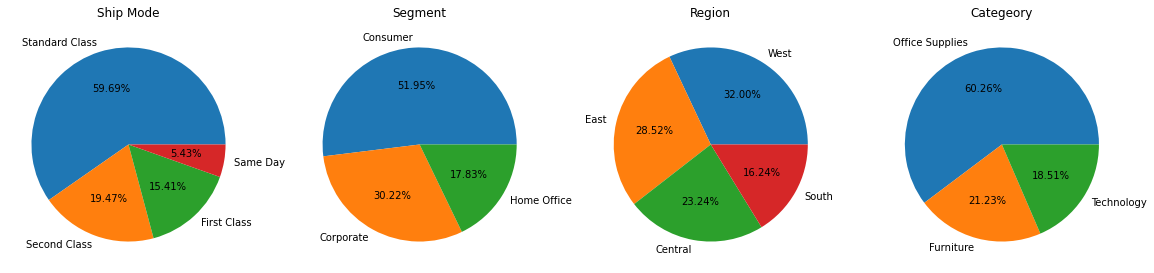

In [63]:
# countplots based on categorical data

plt.figure(figsize=(20,10))
plt.subplot(141), plt.title('Ship Mode'), plt.pie(data_sub['Ship Mode'].value_counts(), labels=data_sub['Ship Mode'].value_counts().index, autopct='%.2f%%')
plt.subplot(142), plt.title('Segment'), plt.pie(data_sub['Segment'].value_counts(), labels=data_sub['Segment'].value_counts().index, autopct='%.2f%%')
plt.subplot(143), plt.title('Region'), plt.pie(data_sub['Region'].value_counts(), labels=data_sub['Region'].value_counts().index, autopct='%.2f%%')
plt.subplot(144), plt.title('Categeory'), plt.pie(data_sub['Category'].value_counts(), labels=data_sub['Category'].value_counts().index, autopct='%.2f%%')

plt.show()

In [64]:
df = data_sub.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.377982,0.154844,16.027769
3,175.630896,0.153321,23.720306
4,272.779827,0.158373,37.227971
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


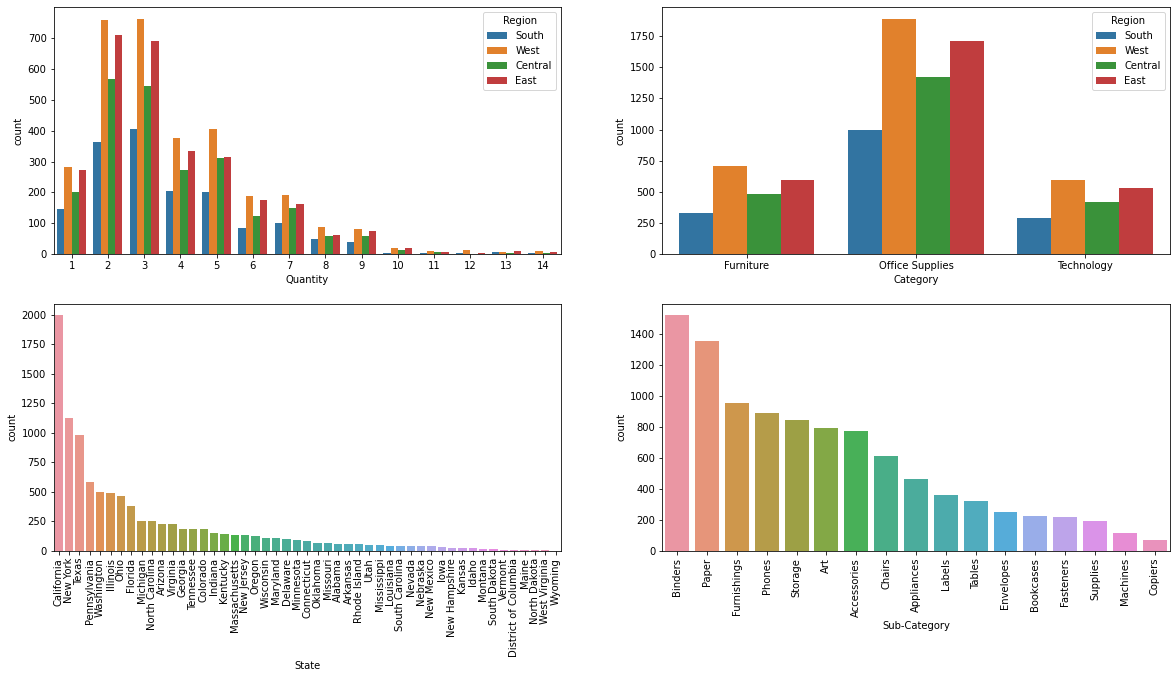

In [103]:
plt.figure(figsize=(20,10))
plt.subplot(221), sns.countplot(x=data_sub['Quantity'], hue=data_sub['Region'])
plt.subplot(222), sns.countplot(x=data_sub['Category'], hue=data_sub['Region'])
plt.subplot(223), sns.countplot(x=data_sub['State'], order=data_sub['State'].value_counts().index), plt.xticks(rotation=90)
plt.subplot(224), sns.countplot(x=data_sub['Sub-Category'], order=data_sub['Sub-Category'].value_counts().index), plt.xticks(rotation=90)

plt.show()

In [89]:
# clients tend to buy in quantities of '2' and '3'
# greatest numbers of categories sold is 'Office Supplies'
# most buys are in the 'West' and 'East' regions

# most buys are from 'California' / 'New York' / 'Texas'
# 'Binders' / 'Paper' are the 2 most bought sub-catgories
# they belong to office supplies

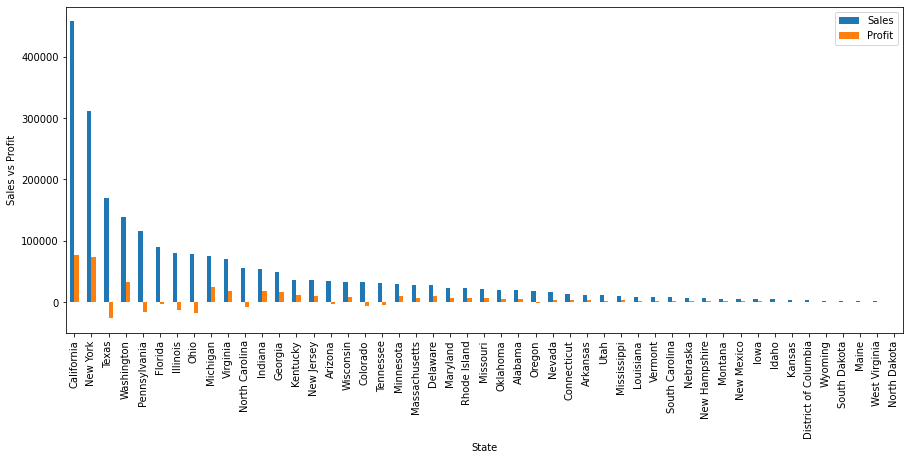

In [116]:
df = data_sub.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
df.plot.bar(figsize=(15,6))
plt.ylabel('Sales vs Profit')
plt.show()

In [117]:
# sales and profits are highest in 'California' and 'New York'
# 'Washington' / 'Michigan' / 'Virginia' provide reasonable numbers